In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

-- This is an extended version of `dog_classifier.ipynb`, where in version 1, we only had 3 classes (german_shepherd, pitbull, and poodle).
-
- In this version, v2, we are extending v1 by adding in 12 additional classes, where the variety of dog breeds increases dramatically, as well
    as the fact that 4 of classes can be almost (or completely?) broken down into 2 `sets` of classes (dog breeds), and this means that the
    ability of the model to differentiate between not just vastly different dogs is required, but also to ability to differentiate the subtle (and
    often times indistinguisable to my eyes) differences between dogs of almost identical breed-type.
-
-- Here are all the `classes` (dog breeds) we'll be classifying:
-
- (1) german_shepherd
- (2) poodle
- (3) pitbull
- (4) boxer
- (5) retriever_labrador
- (6) retriever_golden
- (7) french_bulldog
- (8) bulldog
- (9) beagle
- (10) rottweiler
- (11) yorkshire_terrier
- (12) pointer_german_shorthaired
- (13) siberian_husky
- (14) dachshund
- (15) great_dane

-- Total # of classes: 15
-

In [2]:
# import usual code for vision modeling
from fastai.vision import *

In [3]:
# here we'll set the `path` variable, which WON'T be changed, and will be used throughout the notebook (program)
path = Path('data/dogs')

In [17]:
(path/'models').ls()

[PosixPath('data/dogs/models/stage-alphabeta-zero.pth'),
 PosixPath('data/dogs/models/stage0.pth'),
 PosixPath('data/dogs/models/stage-0.pth'),
 PosixPath('data/dogs/models/dogmodel-stage-alphabeta.pth'),
 PosixPath('data/dogs/models/dogmodel-stage-1.pth'),
 PosixPath('data/dogs/models/dogmodel-007.pth'),
 PosixPath('data/dogs/models/tmp.pth'),
 PosixPath('data/dogs/models/stage-1-unfrozen.pth'),
 PosixPath('data/dogs/models/stage-0-frozen.pth'),
 PosixPath('data/dogs/models/dogmodel-alphabeta-zero-theta.pth'),
 PosixPath('data/dogs/models/beta.pth'),
 PosixPath('data/dogs/models/dogmodel-stage-alpha.pth')]

In [4]:
# we'll also create a Python-list of our classes, which also won't be modified, and will be used throughout the notebook
classes = ['german_shepherd', 'poodle', 'pitbull', 'boxer',
           'retriever_labrador', 'retriever_golden', 'french_bulldog',
           'bulldog', 'beagle', 'rottweiler', 'yorkshire_terrier',
           'pointer_german_shorthaired', 'siberian_husky',
           'dachshund', 'great_dane']

In [5]:
# inital metrics to measure model's accuracy (subject to change)
metrics = [accuracy, error_rate]

# The following 3 code cells will need to be run for each class (dog breed) separately, except for:
''' (1) greate_dane
    (2) poodle
    (3) pitbull
    --> they've already had their directories created, images downloaded form url-text-file, and have been cleaned up a bit.
'''

In [8]:
# 1 --> boxer
folder = 'boxer'
file    = 'urls_boxer.txt'

In [15]:
# 2 --> retriever_labrador
folder = 'retriever_labrador'
file    = 'urls_retriever_labrador.txt'

In [18]:
# 3 --> retriever_golden
folder = 'retriever_golden'
file    = 'urls_retriever_golden.txt'

In [21]:
# 4 --> french_bulldog
folder = 'french_bulldog'
file    = 'urls_french_bulldog.txt'

In [24]:
# 5 --> bulldog
folder = 'bulldog'
file    = 'urls_bulldog.txt'

In [28]:
# 6 --> beagle
folder = 'beagle'
file    = 'urls_beagle.txt'

In [31]:
# 7 --> rottweiler
folder = 'rottweiler'
file    = 'urls_rottweiler.txt'

In [34]:
#8 --> yorkshire_terrier
folder = 'yorkshire_terrier'
file    = 'urls_yorkshire_terrier.txt'

In [37]:
#9 --> pointer_german_shorthaired
folder = 'pointer_german_shorthaired'
file    = 'urls_pointer_german_shorthaired.txt'

In [40]:
# 10 --> siberian_husky
folder = 'siberian_husky'
file    = 'urls_siberian_husky.txt'

In [43]:
# 11 --> dachshund
folder = 'dachshund'
file    = 'urls_dachshund.txt'

In [46]:
# 12 --> great_dane
folder = 'great_dane'
file    = 'urls_great_dane.txt'

In [47]:
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [48]:
download_images(path/folder/file, dest, max_pics=500)

Error https://www.dog.com/Breeds/images/AllBreeds/116.jpg HTTPSConnectionPool(host='www.dog.com', port=443): Read timed out. (read timeout=4)
Error https://upsidedowndogs.com/wp-content/uploads/2009/03/archie-the-great-dane-upside-down-dog.jpg HTTPConnectionPool(host='127.0.0.1', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7feb08bb36a0>: Failed to establish a new connection: [Errno 111] Connection refused'))


-- Final thing todo before creating our databunch and model, which is to clean our data!
-

In [49]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

german_shepherd


poodle


pitbull


boxer


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/boxer/00000473.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/boxer/00000057.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/boxer/00000385.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/boxer/00000168.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/boxer/00000466.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/boxer/00000208.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/boxer/00000248.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/boxer/00000180.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/boxer/00000308.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/boxer/00000292.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/boxer/00000094.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/boxer/00000496.jpg'>
retriever_labrador


cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000455.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000200.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000495.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000179.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000406.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000316.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000078.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000421.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000266.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000202.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000439.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000171.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/dogs/retriever_labrador/00000323.jpg'>
retriever_golden


cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000281.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000200.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000431.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000156.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000284.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000198.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000159.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000398.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000406.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000290.jpg'>
cannot identify image file <_io.BufferedReader nam

/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000411.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000054.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000486.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/retriever_golden/00000436.jpg'>
french_bulldog


cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000214.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000219.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000441.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000079.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000221.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000082.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000092.jpeg'>
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000263.png'>
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000228.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000299.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000034.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000051.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000486.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000138.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/french_bulldog/00000447.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


bulldog


cannot identify image file <_io.BufferedReader name='data/dogs/bulldog/00000209.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/dogs/bulldog/00000115.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/bulldog/00000137.jpeg'>
cannot identify image file <_io.BufferedReader name='data/dogs/bulldog/00000117.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/bulldog/00000192.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/bulldog/00000409.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/bulldog/00000097.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/bulldog/00000150.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/bulldog/00000165.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/bulldog/00000436.svg'>
beagle


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/dogs/beagle/00000070.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/beagle/00000430.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/beagle/00000479.svg'>
cannot identify image file <_io.BufferedReader name='data/dogs/beagle/00000207.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/beagle/00000438.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/beagle/00000306.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/beagle/00000393.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/beagle/00000476.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/beagle/00000135.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/beagle/00000333.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
rottweiler


cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000410.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000083.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000374.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000201.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000459.png'>
cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000342.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000316.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000301.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000351.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000081.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000211.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000425.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/rottweiler/00000255.jpg'>
yorkshire_terrier


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/yorkshire_terrier/00000103.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/yorkshire_terrier/00000148.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/yorkshire_terrier/00000195.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


cannot identify image file <_io.BufferedReader name='data/dogs/yorkshire_terrier/00000018.jpg'>
int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/yorkshire_terrier/00000161.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/yorkshire_terrier/00000119.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/yorkshire_terrier/00000295.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/yorkshire_terrier/00000014.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/yorkshire_terrier/00000403.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/yorkshire_terrier/00000496.svg'>
cannot identify image file <_io.BufferedReader name='data/dogs/yorkshire_terrier/00000465.jpg'>
pointer_german_shorthaired


cannot identify image file <_io.BufferedReader name='data/dogs/pointer_german_shorthaired/00000185.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/pointer_german_shorthaired/00000389.png'>
cannot identify image file <_io.BufferedReader name='data/dogs/pointer_german_shorthaired/00000200.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/dogs/pointer_german_shorthaired/00000044.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/pointer_german_shorthaired/00000362.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/pointer_german_shorthaired/00000283.png'>
cannot identify image file <_io.BufferedReader name='data/dogs/pointer_german_shorthaired/00000234.jpeg'>
cannot identify image file <_io.BufferedReader name='data/dogs/pointer_german_shorthaired/00000240.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/pointer_german_shorthaired/00000202.JPG'>
cannot identify image file <_io.BufferedReader name='data/dogs/pointer_german_shorthaired/00000415.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/pointer_german_shorthaired/00000179.png'>
cannot identify image file <_io.BufferedReader name='data/dogs/pointer_german_shorthaired/00000302.jpg'>
cannot identify image file <_io.BufferedReader name='d

cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000105.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000227.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000120.jpeg'>
cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000161.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000191.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000335.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000258.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000405.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000484.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000412.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000399.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000223.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/siberian_husky/00000061.png'>
dachshund


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000265.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000147.png'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000256.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000071.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000310.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000192.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +
/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000360.jpg'>
int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000294.png'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000342.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000453.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000317.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000086.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000133.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000075.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000315.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000393.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000406.png'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000131.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000266.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000053.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000211.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000099.jpg'>
int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000166.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000345.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000496.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/dachshund/00000480.jpg'>
great_dane


cannot identify image file <_io.BufferedReader name='data/dogs/great_dane/00000124.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/great_dane/00000254.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/great_dane/00000139.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/great_dane/00000382.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/great_dane/00000181.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/dogs/great_dane/00000191.jpg'>
cannot identify image file <_io.BufferedReader name='data/dogs/great_dane/00000328.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:1005: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry " +


cannot identify image file <_io.BufferedReader name='data/dogs/great_dane/00000456.jpg'>
int() argument must be a string, a bytes-like object or a number, not 'tuple'


-- Now it's time to create our (1) ImageDataBunch (our data) and (2) Model (our dogmodel)
-

In [44]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", ds_tfms=get_transforms(), valid_pct=0.2,
                                  size=224, num_workers=4).normalize(imagenet_stats)

#data.show_batch(rows=4)

#data.classes, data.c

In [45]:
#dogmodel = cnn_learner(data, models.resnet34, metrics=metrics)
dogmodel = cnn_learner(data, models.resnet50, metrics=metrics)

In [46]:
dogmodel.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (5689 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
retriever_golden,retriever_golden,retriever_golden,retriever_golden,retriever_golden
Path: data/dogs;

Valid: LabelList (1422 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
french_bulldog,yorkshire_terrier,bulldog,retriever_labrador,pointer_german_shorthaired
Path: data/dogs;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel

In [56]:
dogmodel.load('beta', strict=False, purge=False, remove_module=True)

Learner(data=ImageDataBunch;

Train: LabelList (5689 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
retriever_golden,retriever_golden,retriever_golden,retriever_golden,retriever_golden
Path: data/dogs;

Valid: LabelList (1422 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
french_bulldog,yorkshire_terrier,bulldog,retriever_labrador,pointer_german_shorthaired
Path: data/dogs;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [61]:
p = '/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/data/lucypic.jpg'

In [65]:
p = '/home/jupyter/lucypic.jpg'

In [27]:
lola = '/home/jupyter/Lola-1.jpg'
lucy = '/home/jupyter/Lucy-2.jpg'

In [67]:
image = open_image(p)

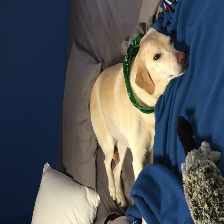

In [22]:
image.resize(224)

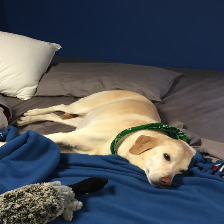

In [67]:
image.rotate(90)

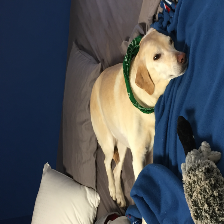

In [82]:
image.rotate(90)

In [69]:
pred_class, pred_idx, outputs = dogmodel.predict(image)

In [70]:
pred_class

Category retriever_labrador

In [62]:
dogmodel.save("working-dogmodel")

In [63]:
dogmodel.export()

In [51]:
dogmodel.fit_one_cycle(1)

In [89]:
dogmodel.freeze()
dogmodel.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.459794,0.446136,0.879747,0.120253,00:52


In [90]:
dogmodel.unfreeze()
dogmodel.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.647021,0.486890,0.855837,0.144163,01:10


In [14]:
dogmodel.fit_one_cycle(4)

dogmodel.unfreeze()
dogmodel.lr_find()
dogmodel.recorder.plot()

lr = slice(1e-6,1e-5)

dogmodel.fit_one_cycle(4, max_lr=lr)

dogmodel.lr_find()
dogmodel.recorder.plot()



dogmodel.fit_one_cycle(4, max_lr=1e-6)

def findme():
    dogmodel.lr_find()
    dogmodel.recorder.plot()

findme()

lr = 3e-6

dogmodel.fit_one_cycle(8, max_lr=slice(lr))

dogmodel.freeze_to(-2)
dogmodel.fit_one_cycle(8, max_lr=slice(lr))

dogmodel.unfreeze()
dogmodel.fit_one_cycle(8, max_lr=slice(lr))

dogmodel.freeze_to(-3)
dogmodel.fit_one_cycle(9, max_lr=slice(lr))

# modify the `accuracy` and `error_rate` metrics to go further out in decimal places.

dogmodel.unfreeze()
dogmodel.fit_one_cycle(9, max_lr=slice(lr))

dogmodel.save('dogmodel-stage-alpha')

dogmodel.freeze_to(-4)
dogmodel.fit_one_cycle(10, max_lr=slice(lr))

dogmodel.unfreeze()
dogmodel.fit_one_cycle(10, max_lr=slice(lr))

dogmodel.save('dogmodel-stage-alphabeta')

dogmodel.freeze_to(-5)
dogmodel.fit_one_cycle(11, max_lr=slice(lr))

dogmodel.unfreeze()
dogmodel.fit_one_cycle(11, max_lr=slice(lr))

dogmodel.save('stage-alphabeta-zero')

dogmodel.freeze_to(-4)
dogmodel.fit_one_cycle(11, max_lr=slice(lr))
dogmodel.unfreeze()
dogmodel.fit_one_cycle(11, max_lr=slice(lr))

dogmodel.save('dogmodel-alphabeta-zero-theta')

dogmodel.freeze_to(-4)
dogmodel.fit_one_cycle(11, max_lr=slice(lr))
dogmodel.unfreeze()
dogmodel.fit_one_cycle(11, max_lr=slice(lr))

dogmodel.save('dogmodel-007')

dogmodel.freeze_to(-4)
dogmodel.fit_one_cycle(12, max_lr=slice(lr))
dogmodel.unfreeze()
dogmodel.fit_one_cycle(12, max_lr=slice(lr))
dogmodel.freeze_to(-5)
dogmodel.fit_one_cycle(12, max_lr=slice(lr))
dogmodel.unfreeze()
dogmodel.fit_one_cycle(12, max_lr=slice(lr))

dogmodel.save('beta')

In [52]:
interpreter = ClassificationInterpretation.from_learner(dogmodel)

IndexError: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 138, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 633, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 109, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/vision/data.py", line 270, in get
    fn = super().get(i)
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 66, in get
    return self.items[i]
IndexError: index 0 is out of bounds for axis 0 with size 0


In [96]:
interpreter.most_confused()

[('bulldog', 'french_bulldog', 29),
 ('french_bulldog', 'bulldog', 11),
 ('retriever_labrador', 'retriever_golden', 11),
 ('pointer_german_shorthaired', 'great_dane', 8),
 ('retriever_golden', 'retriever_labrador', 8),
 ('bulldog', 'pitbull', 7),
 ('boxer', 'great_dane', 6),
 ('german_shepherd', 'siberian_husky', 5),
 ('pitbull', 'great_dane', 5),
 ('boxer', 'dachshund', 4),
 ('boxer', 'pitbull', 4),
 ('bulldog', 'great_dane', 4),
 ('dachshund', 'yorkshire_terrier', 4),
 ('great_dane', 'pitbull', 4),
 ('poodle', 'retriever_golden', 4),
 ('beagle', 'pointer_german_shorthaired', 3),
 ('dachshund', 'beagle', 3),
 ('dachshund', 'retriever_golden', 3),
 ('french_bulldog', 'great_dane', 3),
 ('great_dane', 'dachshund', 3),
 ('great_dane', 'french_bulldog', 3),
 ('pointer_german_shorthaired', 'dachshund', 3),
 ('beagle', 'boxer', 2),
 ('boxer', 'retriever_labrador', 2),
 ('bulldog', 'boxer', 2),
 ('dachshund', 'boxer', 2),
 ('dachshund', 'poodle', 2),
 ('french_bulldog', 'pitbull', 2),
 ('pit

In [101]:
dogmodel.save('loadme')

In [103]:
db = (ImageList.from_folder(path)
      .split_none()
      .label_from_folder()
      .transform(get_transforms(), size=224)
      .databunch())

In [104]:
dmodel = cnn_learner(db, models.resnet50, metrics=metrics)

In [105]:
dmodel.load('loadme')

Learner(data=ImageDataBunch;

Train: LabelList (7111 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
retriever_golden,retriever_golden,retriever_golden,retriever_golden,retriever_golden
Path: data/dogs;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/dogs;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), 

In [106]:
ds, idxs = DatasetFormatter().from_toplosses(dmodel)

In [108]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [109]:
path.ls()

[PosixPath('data/dogs/models'),
 PosixPath('data/dogs/retriever_golden'),
 PosixPath('data/dogs/beagle'),
 PosixPath('data/dogs/dachshund'),
 PosixPath('data/dogs/poodle'),
 PosixPath('data/dogs/german_shepherd'),
 PosixPath('data/dogs/french_bulldog'),
 PosixPath('data/dogs/retriever_labrador'),
 PosixPath('data/dogs/yorkshire_terrier'),
 PosixPath('data/dogs/cleaned.csv'),
 PosixPath('data/dogs/siberian_husky'),
 PosixPath('data/dogs/.ipynb_checkpoints'),
 PosixPath('data/dogs/boxer'),
 PosixPath('data/dogs/rottweiler'),
 PosixPath('data/dogs/pitbull'),
 PosixPath('data/dogs/pointer_german_shorthaired'),
 PosixPath('data/dogs/bulldog'),
 PosixPath('data/dogs/great_dane')]

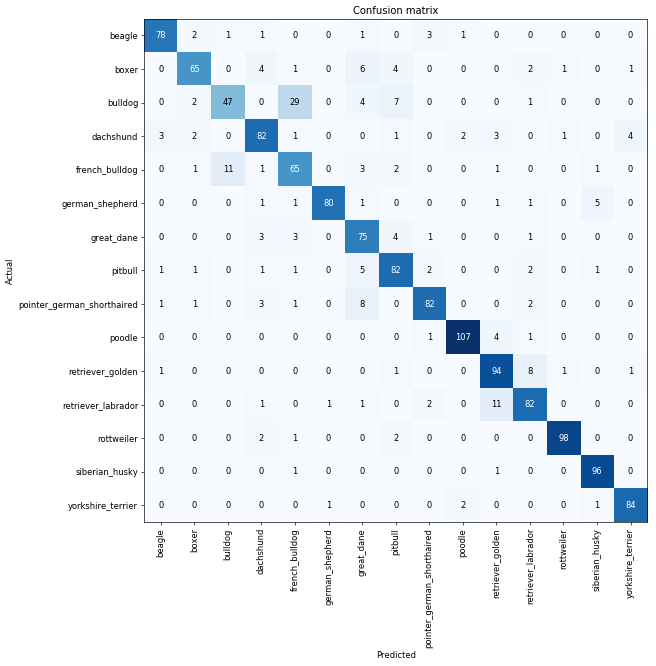

In [93]:
interpreter.plot_confusion_matrix(figsize=(15,11), dpi=60)

In [15]:
from fastai.widgets import *

In [110]:
dmodel.save("dmodel-0")

In [111]:
dogmodel.save("dogmodel-0")

In [9]:
! wc -l data/dogs/cleaned.csv

6925 data/dogs/cleaned.csv


In [53]:
imdb = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
       .split_none()
        .label_from_df()
        .transform(get_transforms(), size=224)
        .databunch()
       ).normalize(imagenet_stats)

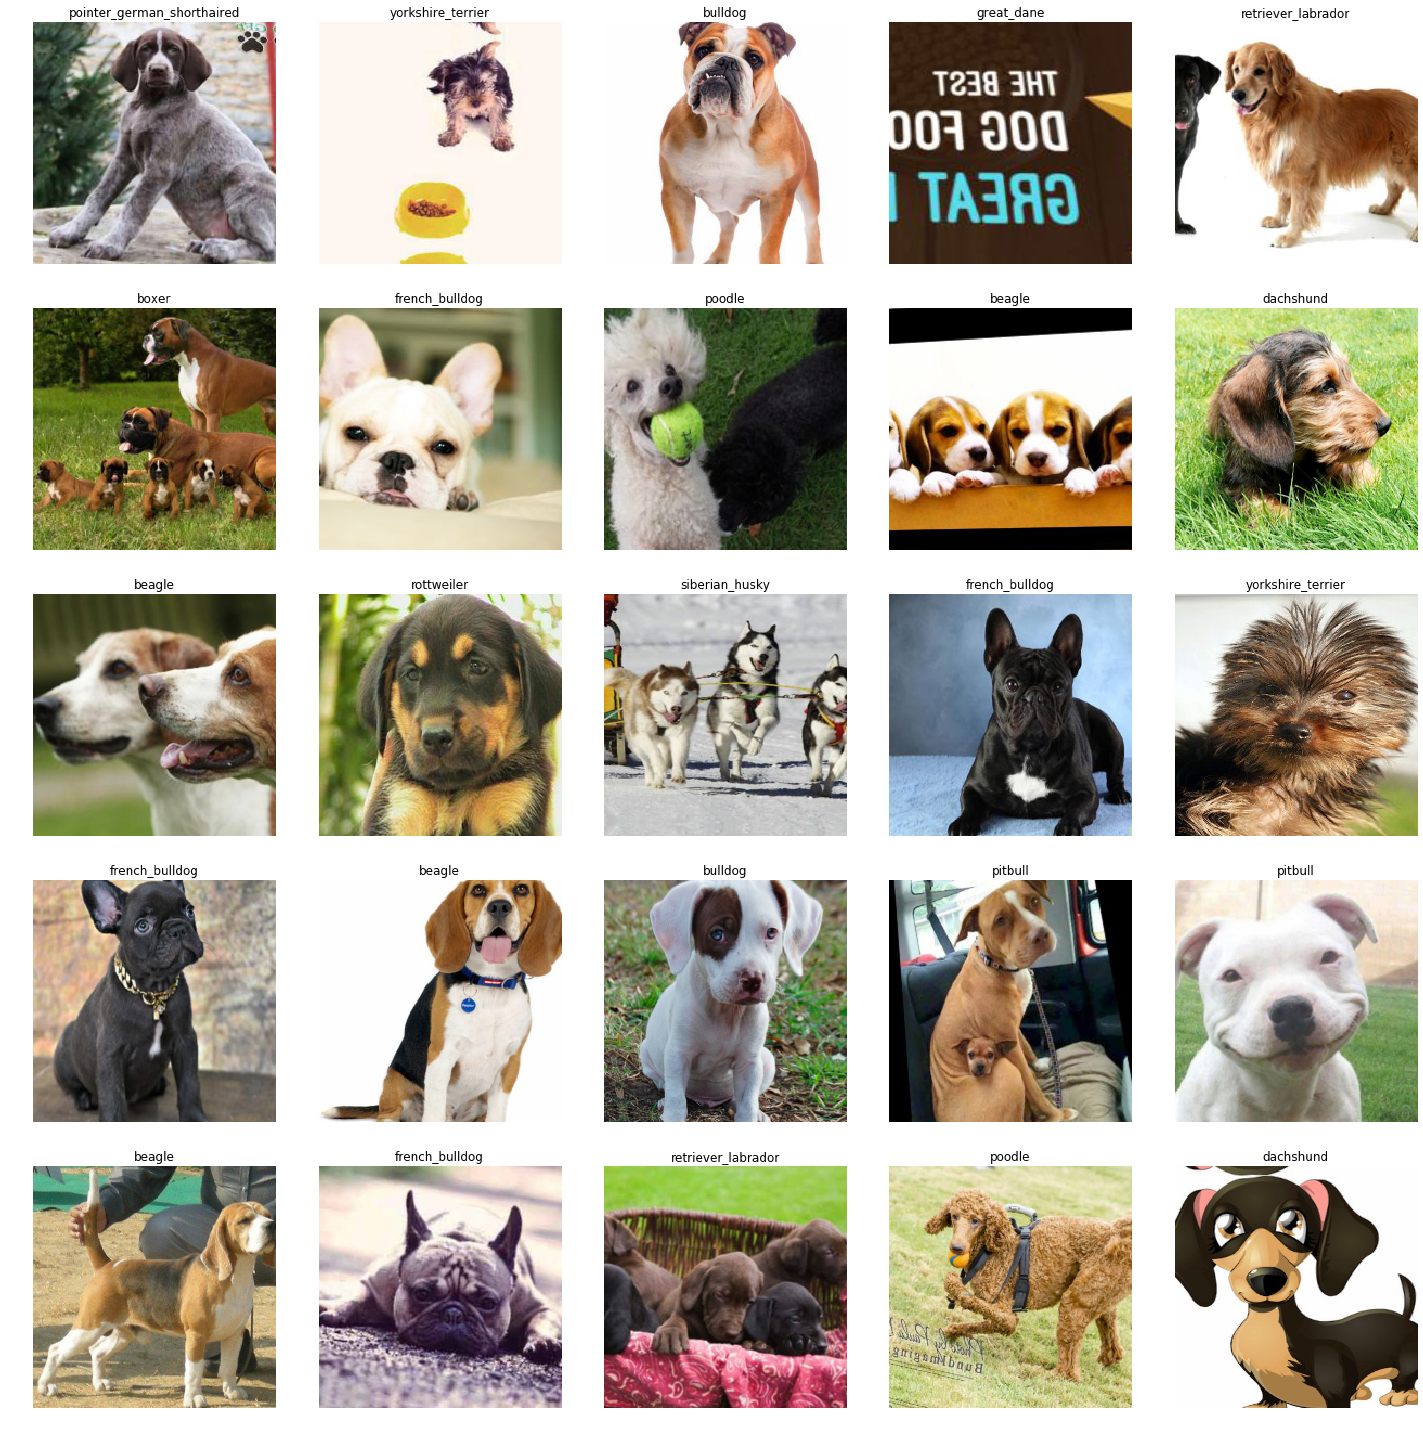

In [13]:
imdb.show_batch()

In [54]:
dogmodel = cnn_learner(imdb, models.resnet50, metrics=metrics)

In [16]:
dogmodel.load('dmodel-0');

In [55]:
dogmodel.load('dogmodel-0')

Learner(data=ImageDataBunch;

Train: LabelList (6924 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
retriever_golden,retriever_golden,retriever_golden,retriever_golden,retriever_golden
Path: data/dogs;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/dogs;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), 

In [151]:
dogmodel.save('pre-extended-training')

In [152]:
dogmodel.export('pre-extended-training')

In [153]:
dogmodel.fit_one_cycle(1)

In [154]:
dogmodel.unfreeze()
dogmodel.fit_one_cycle(1)

In [155]:
dogmodel

Learner(data=ImageDataBunch;

Train: LabelList (6924 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
retriever_golden,retriever_golden,retriever_golden,retriever_golden,retriever_golden
Path: data/dogs;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/dogs;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), 